In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Base_limpia.csv',encoding="iso-8859-1",dtype={'CustomerID':str}).drop('Unnamed: 0',axis=1)
print(df.shape)
df.head()

(399169, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
df['Semana']= pd.to_datetime(df.InvoiceDate).dt.date.map(lambda x:x.strftime('%U')).astype(int)
df['Ano']=pd.to_datetime(df.InvoiceDate).dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010


In [4]:
df['w']=df.Ano.map(str) + df.Semana.map(lambda x: str(x) if x>=10 else '0{}'.format(x))
df['w']=df['w'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,201048
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,201048
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048


In [5]:
df[df.Ano==2010].w.value_counts()

201049    10814
201050     8039
201048     5001
201051     2357
Name: w, dtype: int64

In [6]:
201101-201051

50

In [7]:
df['w']= df.w.map(lambda x:x+49 if str(x)[:4]=='2010' else x).map(lambda x:x-201097)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0


In [9]:
df['Importe']=df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w,Importe
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34


In [10]:
Ventas=df[['InvoiceNo','w','Importe','CustomerID']].groupby(['InvoiceNo','w','CustomerID']).sum().reset_index()
aux1=df[df.Importe>0][['InvoiceNo','w','Importe','CustomerID']].groupby(['w','InvoiceNo','CustomerID']).sum().reset_index()
aux2=df[df.Importe>0][['StockCode','w','Importe']].groupby(['w','StockCode']).count().reset_index()

In [11]:
{'x1':'No_ventas', 'x2':'Venta_promedio', 'x3':'Tasa_devueltos', 'x4':'No_clientes_recurrentes', 'x5':'No_articulos_recurrentes'}

{'x1': 'No_ventas',
 'x2': 'Venta_promedio',
 'x3': 'Tasa_devueltos',
 'x4': 'No_clientes_recurrentes',
 'x5': 'No_articulos_recurrentes'}

In [12]:
t = pd.DataFrame(range(53),columns=['w'])
for k in range(4):
    #hacia atras    
    t['x1_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.Importe>0) & (Ventas.w<=x)&(Ventas.w>=x-k)].shape[0])
    t['x2_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.w<=x)&(Ventas.w>=x-k)].Importe.mean())
    t['x3_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.Importe<0)&(Ventas.w<=x)&(Ventas.w>=x-k)].shape[0]/ Ventas[(Ventas.w<=x)&(Ventas.w>=x-k)].shape[0])
    t['x4_%d'%(k+1)]=t.w.map(lambda x:(aux1[(aux1.w<=x)&(aux1.w>=x-k)][['CustomerID','Importe']].groupby('CustomerID').count().Importe>1)
                    .astype(int).sum())
    t['x5_%d'%(k+1)]=t.w.map(lambda x:(aux2[(aux2.w<=x)&(aux2.w>=x-k)].Importe>1).astype(int).sum())
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x1_3,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4
0,0,312,318.773150,0.098266,33,894,312,318.773150,0.098266,33,...,312,318.773150,0.098266,33,894,312,318.773150,0.098266,33,894
1,1,529,319.767520,0.148148,63,1340,841,319.411727,0.130300,119,...,841,319.411727,0.130300,119,2234,841,319.411727,0.130300,119,2234
2,2,423,298.812468,0.220994,47,1238,952,309.992096,0.182131,170,...,1264,312.004179,0.162914,238,3472,1264,312.004179,0.162914,238,3472
3,3,124,280.943161,0.287356,18,461,547,294.475983,0.237099,77,...,1076,306.214432,0.195815,194,3039,1388,308.794786,0.175772,262,3933
4,4,175,411.289324,0.211712,11,817,299,354.016010,0.244949,38,...,722,322.093195,0.231097,111,2516,1251,321.167397,0.198077,241,3856


In [13]:
aux=Ventas[['w','Importe']].groupby('w').sum().reset_index()
t['w0']=t.w + 2
t = t.merge(aux,left_on=['w0'],right_on=['w'],how='left')
t.drop(['w0','w_y'],axis=1,inplace=True)
t.rename(columns={'Importe':'target','w_x':'w'},inplace=True)
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
0,0,312,318.773150,0.098266,33,894,312,318.773150,0.098266,33,...,318.773150,0.098266,33,894,312,318.773150,0.098266,33,894,162255.17
1,1,529,319.767520,0.148148,63,1340,841,319.411727,0.130300,119,...,319.411727,0.130300,119,2234,841,319.411727,0.130300,119,2234,48884.11
2,2,423,298.812468,0.220994,47,1238,952,309.992096,0.182131,170,...,312.004179,0.162914,238,3472,1264,312.004179,0.162914,238,3472,91306.23
3,3,124,280.943161,0.287356,18,461,547,294.475983,0.237099,77,...,306.214432,0.195815,194,3039,1388,308.794786,0.175772,262,3933,122321.59
4,4,175,411.289324,0.211712,11,817,299,354.016010,0.244949,38,...,322.093195,0.231097,111,2516,1251,321.167397,0.198077,241,3856,90559.22


In [14]:
t=t[(t.w>=3)&(t.w<=50)].reset_index(drop=True)
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
0,3,124,280.943161,0.287356,18,461,547,294.475983,0.237099,77,...,306.214432,0.195815,194,3039,1388,308.794786,0.175772,262,3933,122321.59
1,4,175,411.289324,0.211712,11,817,299,354.016010,0.244949,38,...,322.093195,0.231097,111,2516,1251,321.167397,0.198077,241,3856,90559.22
2,5,252,398.441661,0.179153,16,942,427,403.833308,0.192817,47,...,373.416686,0.216216,75,2220,974,340.904575,0.218299,167,3458,102523.31
3,6,200,362.236880,0.200000,17,883,452,382.191759,0.188510,49,...,390.484005,0.195122,79,2642,751,370.483893,0.211962,103,3103,103047.26
4,7,268,307.877808,0.195195,17,977,468,331.187873,0.197256,41,...,354.386652,0.191011,92,2802,895,365.746718,0.195144,129,3619,78875.50


In [18]:
t.describe(percentiles=[0.01,0.02,0.05,0.95,0.99])

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,26.50,331.125000,367.414549,0.162480,32.020833,1099.062500,657.916667,367.652405,0.162404,81.541667,...,367.532688,0.162219,140.750000,3270.520833,1300.062500,366.981183,0.162117,208.208333,4337.375000,152585.910062
std,14.00,113.490205,57.769839,0.039390,14.028072,276.823272,202.851359,47.824321,0.028679,32.520997,...,42.641432,0.023106,51.518433,710.182925,329.414206,38.595279,0.020308,67.714972,897.487335,55685.755088
min,3.00,124.000000,280.943161,0.088150,11.000000,461.000000,299.000000,294.220704,0.114720,38.000000,...,300.310921,0.120370,75.000000,2220.000000,751.000000,306.503061,0.124453,103.000000,3103.000000,62083.760000
1%,3.47,147.500000,285.192461,0.097257,11.000000,556.880000,359.160000,294.340685,0.117833,39.410000,...,302.613102,0.125229,76.880000,2359.120000,818.680000,307.347339,0.129009,111.930000,3269.850000,69975.877800
2%,3.94,171.000000,289.441760,0.106364,11.000000,652.760000,419.320000,294.460667,0.120946,40.820000,...,304.915282,0.130088,78.760000,2498.240000,886.360000,308.191617,0.133565,120.860000,3436.700000,77867.995600
5%,5.35,179.200000,301.165609,0.120328,16.000000,718.550000,446.150000,305.935190,0.128883,46.350000,...,306.319687,0.134688,84.400000,2540.350000,948.600000,311.434250,0.137534,131.800000,3527.000000,84456.948500
50%,26.50,313.500000,360.474851,0.156060,30.500000,1028.000000,593.500000,355.155965,0.156879,74.000000,...,361.274332,0.157738,129.000000,3043.500000,1221.500000,365.627948,0.161092,197.500000,4067.000000,137410.870000
95%,47.65,577.000000,463.188186,0.228321,61.200000,1616.250000,1052.900000,441.465987,0.212850,139.650000,...,448.329937,0.203018,224.950000,4692.400000,1897.100000,430.097465,0.202858,314.550000,6232.300000,254533.116000
99%,49.53,641.070000,514.585739,0.286841,68.000000,1694.020000,1275.360000,471.608119,0.241260,188.650000,...,450.252027,0.224103,318.790000,4960.190000,2305.940000,442.571851,0.215320,441.330000,6506.300000,261532.743300


In [478]:
X=t[[x for x in t.columns if x not in ['w','target']]]
Y=t[['target']].copy()

In [479]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

In [480]:
sc=MinMaxScaler()
Xs=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [481]:
Xt, Xv, yt, yv = train_test_split(Xs,Y,train_size=0.7)

In [482]:
modelo1=LinearRegression()
modelo2= PassiveAggressiveRegressor()
modelo3=SVR()

In [483]:
modelo1.fit(Xt,yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [484]:
print(mean_absolute_error(y_pred=modelo1.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo1.predict(Xv),y_true=yv))

22271.195870664116
47806.56134675557


In [487]:
param = dict(C=np.arange(0,20,0.1))
grid = GridSearchCV(param_grid=param,cv=2,estimator=modelo2,n_jobs=-1,
                    error_score='mean_absolute_error',verbose=True)
grid.fit(Xt,yt)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: error_score must be the string 'raise' or a numeric value. (Hint: if using 'raise', please make sure that it has been spelled correctly.)

In [433]:
grid.best_score_, grid.best_params_

(0.49601206935382575, {'C': 13.68})

In [434]:
modelo_pasivo=grid.best_estimator_.fit(Xt,yt)

/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [435]:
print(mean_absolute_error(y_pred=modelo_pasivo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_pasivo.predict(Xv),y_true=yv))

29324.145096131037
31329.164871874244


In [440]:
param2 = dict(C=np.arange(0,3000,1),kernel=('poly', 'rbf'))
grid2 = GridSearchCV(param_grid=param2,cv=2,estimator=modelo3,n_jobs=-1,
                    verbose=True)
grid2.fit(Xt,yt)

Fitting 2 folds for each of 4000 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   37.8s finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1000, 1001, 1002, ..., 2997, 2998, 2999]),
                         'kernel': ('poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [441]:
grid2.best_score_, grid2.best_params_

(0.5759571118477256, {'C': 2167, 'kernel': 'poly'})

In [442]:
modelo_SVR=grid2.best_estimator_.fit(Xt,yt)

/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [443]:
print(mean_absolute_error(y_pred=modelo_SVR.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_SVR.predict(Xv),y_true=yv))

21097.383655237256
27302.18839595332


In [444]:
Y['y^1']=modelo_pasivo.predict(Xs)
Y['y^2']=modelo_SVR.predict(Xs)

In [445]:
Y.sample(10)

,target,y^1,y^2
44,261713.51,199341.941751,237232.835826
46,226497.71,226736.876850,226497.905575
18,174963.31,91674.207411,118938.355613
3,103047.26,121481.921789,110709.480975
16,107581.87,113031.180027,122773.438947
47,224122.58,224114.548976,224122.532911
26,102498.85,127838.055445,127423.433489
32,144626.49,142979.465967,144626.378941
43,261328.90,193639.603479,216853.248180
38,258009.68,194160.408942,217035.308274


In [446]:
import seaborn as sns

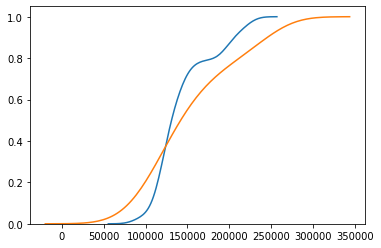

In [447]:
sns.distplot(Y[['y^1']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})

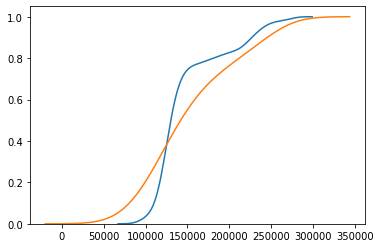

In [448]:
sns.distplot(Y[['y^2']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})

In [449]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [455]:
sk = SelectKBest(f_regression,k=7) 
sk.fit(Xt,yt)
[a for a,b in zip(Xt.columns,sk.get_support()) if b]

/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['x5_1', 'x1_2', 'x5_2', 'x1_3', 'x5_3', 'x1_4', 'x5_4']